In [229]:
import torch 
import numpy as np
from typing import *
import torch.nn as nn 
import torch.nn.functional as F

### **Exercice 01**

### **Q1. prepare time series data**

In [230]:
in_sin = torch.linspace(-np.pi,np.pi,1000)
sine_wave = torch.sinh(in_sin)
sine_wave

tensor([-1.1549e+01, -1.1476e+01, -1.1404e+01, -1.1332e+01, -1.1261e+01,
        -1.1190e+01, -1.1119e+01, -1.1049e+01, -1.0980e+01, -1.0911e+01,
        -1.0842e+01, -1.0774e+01, -1.0706e+01, -1.0639e+01, -1.0572e+01,
        -1.0505e+01, -1.0439e+01, -1.0373e+01, -1.0308e+01, -1.0243e+01,
        -1.0178e+01, -1.0114e+01, -1.0050e+01, -9.9871e+00, -9.9241e+00,
        -9.8616e+00, -9.7994e+00, -9.7377e+00, -9.6763e+00, -9.6153e+00,
        -9.5547e+00, -9.4945e+00, -9.4346e+00, -9.3751e+00, -9.3160e+00,
        -9.2573e+00, -9.1989e+00, -9.1409e+00, -9.0832e+00, -9.0259e+00,
        -8.9690e+00, -8.9124e+00, -8.8562e+00, -8.8003e+00, -8.7448e+00,
        -8.6896e+00, -8.6347e+00, -8.5802e+00, -8.5261e+00, -8.4723e+00,
        -8.4188e+00, -8.3656e+00, -8.3128e+00, -8.2603e+00, -8.2081e+00,
        -8.1563e+00, -8.1048e+00, -8.0536e+00, -8.0027e+00, -7.9521e+00,
        -7.9019e+00, -7.8519e+00, -7.8023e+00, -7.7530e+00, -7.7040e+00,
        -7.6552e+00, -7.6068e+00, -7.5587e+00, -7.5

In [231]:
def _slid_win(series, win_size, look_back):

    #convert tensor to a python list 
    series = series.tolist()
    if look_back:
        series = series[-look_back:]

    X = []
    y = []
    for i in range(len(series)-win_size):
        X.append(series[i:i+win_size])
        y.append(series[i+win_size])

        
    X = torch.tensor(X).reshape(-1,1).reshape(len(X), 1, win_size)
    y = torch.tensor(y).reshape(-1,1)

    return X, y

s = [i for i in range(10)]
X, y = _slid_win(sine_wave, 10, 1000)

In [232]:
X

tensor([[[-11.5487, -11.4761, -11.4038,  ..., -11.0494, -10.9799, -10.9107]],

        [[-11.4761, -11.4038, -11.3321,  ..., -10.9799, -10.9107, -10.8420]],

        [[-11.4038, -11.3321, -11.2607,  ..., -10.9107, -10.8420, -10.7738]],

        ...,

        [[ 10.7059,  10.7738,  10.8420,  ...,  11.1899,  11.2607,  11.3321]],

        [[ 10.7738,  10.8420,  10.9107,  ...,  11.2607,  11.3321,  11.4038]],

        [[ 10.8420,  10.9107,  10.9799,  ...,  11.3321,  11.4038,  11.4761]]])

In [233]:
print(X.shape)
window_size = 10

torch.Size([990, 1, 10])


In [234]:
class CNN(nn.Module):
    def __init__(self, window_size):
        super(CNN, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=1, out_channels=14, kernel_size=3,stride=1)
        self.max_pool = nn.AvgPool1d(kernel_size=2, stride=1)
        
        # Calculate the size after conv1d and maxpool layers
        conv_output_size = window_size - 2  # window_size after Conv1d with kernel_size=3
        pool_output_size = conv_output_size -1  # after MaxPool1d with kernel_size=2 and stride=1
        self.fc1 = nn.Linear(14 * pool_output_size, 10)
        self.fc3 = nn.Linear(10,10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.conv1d(x))
        x = self.max_pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)  
        return x

In [237]:
cnn =CNN(10)
print(X.shape)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)


epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    
    
    predictions = cnn(X)
    

    loss = criterion(predictions, y)
    

    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

torch.Size([990, 1, 10])
Epoch [1/100], Loss: 20.0927
Epoch [2/100], Loss: 19.6171
Epoch [3/100], Loss: 19.1524
Epoch [4/100], Loss: 18.6967
Epoch [5/100], Loss: 18.2489
Epoch [6/100], Loss: 17.8075
Epoch [7/100], Loss: 17.3716
Epoch [8/100], Loss: 16.9406
Epoch [9/100], Loss: 16.5139
Epoch [10/100], Loss: 16.0910
Epoch [11/100], Loss: 15.6716
Epoch [12/100], Loss: 15.2556
Epoch [13/100], Loss: 14.9351
Epoch [14/100], Loss: 14.6401
Epoch [15/100], Loss: 14.3463
Epoch [16/100], Loss: 14.0537
Epoch [17/100], Loss: 13.7624
Epoch [18/100], Loss: 13.4734
Epoch [19/100], Loss: 13.1883
Epoch [20/100], Loss: 12.9180
Epoch [21/100], Loss: 12.6775
Epoch [22/100], Loss: 12.4401
Epoch [23/100], Loss: 12.2047
Epoch [24/100], Loss: 11.9717
Epoch [25/100], Loss: 11.7414
Epoch [26/100], Loss: 11.5141
Epoch [27/100], Loss: 11.2904
Epoch [28/100], Loss: 11.0705
Epoch [29/100], Loss: 10.8548
Epoch [30/100], Loss: 10.6436
Epoch [31/100], Loss: 10.4371
Epoch [32/100], Loss: 10.2357
Epoch [33/100], Loss: 10

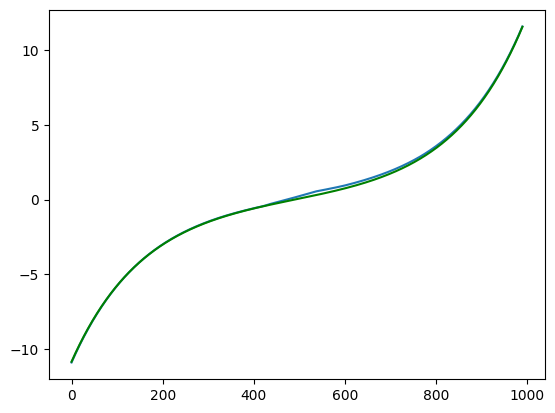

In [236]:
import matplotlib.pyplot as plt
with torch.no_grad():
    plt.plot(np.array(predictions))
    plt.plot(y, 'green')